## Big Data Management

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### Imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

import xgboost as xgb

### Functions

In [3]:
#Functions used lateron to calculate relevant scores for each algorithm

def get_metrics(y_true, y_pred):

    # Berechnung des R²-Scores
    r2 = r2_score(y_true, y_pred)

    # MAE: the average of the absolute differences between the actual values and the predicted values
    mae = mean_absolute_error(y_true, y_pred)

    # MSE: the average of the squared differences between the actual values and the predicted values
    mse = mean_squared_error(y_true, y_pred)

    # RMSE: the square root of MSE
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    # return all three metrics
    return r2, mae, mse, rmse

### Load DataFrames

In [4]:
#df wine attributes
df_wines = pd.read_csv('XWines_Full_100K_wines.csv', sep = ',')
df_wines = df_wines[['WineID', 'WineName', 'Type', 'Elaborate', 'Grapes', 'ABV', 'Body', 'Acidity',
                     'Country', 'RegionID','RegionName', 'WineryID','WineryName']]


#df wine ratings
df_ratings = pd.read_csv('XWines_Full_21M_ratings.csv', sep = ',')

/var/folders/g1/slx9ys0974df000cqkhqp8wr0000gn/T/ipykernel_1769/699736798.py:8: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ratings = pd.read_csv('XWines_Full_21M_ratings.csv', sep = ',')


In [5]:
#shape should be (100646, 13)
df_wines.shape

(100646, 13)

In [6]:
#shape should be (21013536, 6)
df_ratings.shape

(21013536, 6)

## Data Exploration

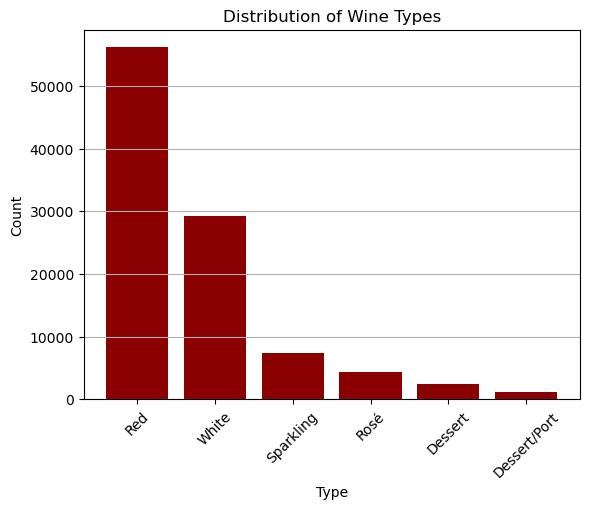

In [8]:
#Visualising df_wines
# Set up subplots in a 1x1 layout
fig, axes = plt.subplots(1, 1)


# Bar Chart for Wine Types Distribution
type_counts = df_wines['Type'].value_counts()
axes.bar(type_counts.index, type_counts.values, color='#8B0000')  # You can change the color to 'wine red'
axes.set_xlabel('Type')
axes.set_ylabel('Count')
axes.set_title('Distribution of Wine Types')
axes.tick_params(axis='x', rotation=45)
axes.grid(axis='y')

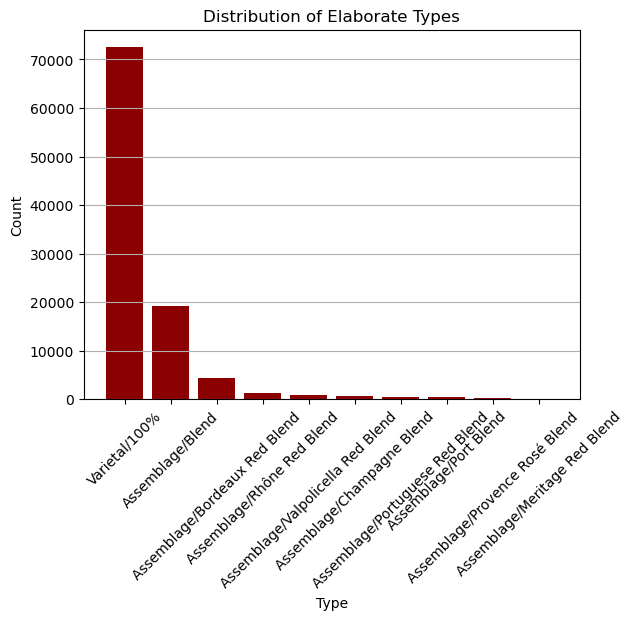

In [9]:
# Set up subplots in a 1x1 layout
fig, axes = plt.subplots(1, 1)

# Bar Chart for Elaborate Distribution
elaborate_counts = df_wines['Elaborate'].value_counts()
filtered_elaborate_counts = elaborate_counts[elaborate_counts > 100]
axes.bar(filtered_elaborate_counts.index, filtered_elaborate_counts.values, color='#8B0000')  # You can change the color to 'wine red'
axes.set_xlabel('Type')
axes.set_ylabel('Count')
axes.set_title('Distribution of Elaborate Types')
axes.tick_params(axis='x', rotation=45)
axes.grid(axis='y')

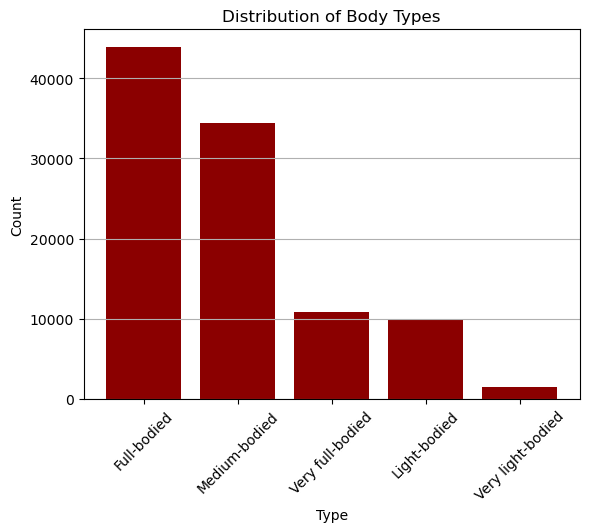

In [10]:
# Set up subplots in a 1x1 layout
fig, axes = plt.subplots(1, 1)

# Bar Chart for Body Distribution
body_counts = df_wines['Body'].value_counts()
axes.bar(body_counts.index, body_counts.values, color='#8B0000')  # You can change the color to 'wine red'
axes.set_xlabel('Type')
axes.set_ylabel('Count')
axes.set_title('Distribution of Body Types')
axes.tick_params(axis='x', rotation=45)
axes.grid(axis='y')

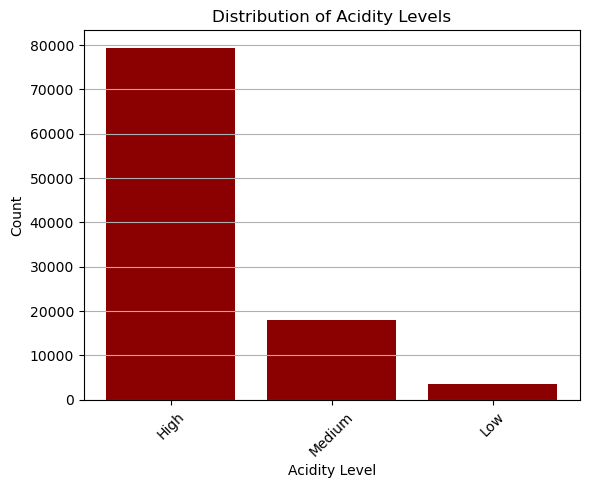

In [11]:
# Set up subplots in a 1x1 layout
fig, axes = plt.subplots(1, 1)

# Bar Chart for Acidity Distribution
acidity_counts = df_wines['Acidity'].value_counts()
axes.bar(acidity_counts.index, acidity_counts.values, color='#8B0000')  # You can change the color to 'wine red'
axes.set_xlabel('Acidity Level')
axes.set_ylabel('Count')
axes.set_title('Distribution of Acidity Levels')
axes.tick_params(axis='x', rotation=45)
axes.grid(axis='y')

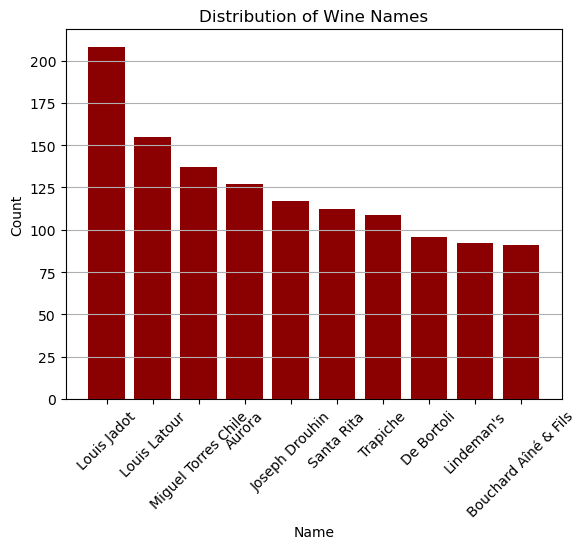

In [12]:
# Set up subplots in a 1x1 layout
fig, axes = plt.subplots(1, 1)

# Bar Chart for Winery Name Distribution
name_counts = df_wines['WineryName'].value_counts()
filtered_name_counts = name_counts[name_counts > 90]
axes.bar(filtered_name_counts.index, filtered_name_counts.values, color='#8B0000')  # You can change the color to 'wine red'
axes.set_xlabel('Name')
axes.set_ylabel('Count')
axes.set_title('Distribution of Wine Names')
axes.tick_params(axis='x', rotation=45)
axes.grid(axis='y')

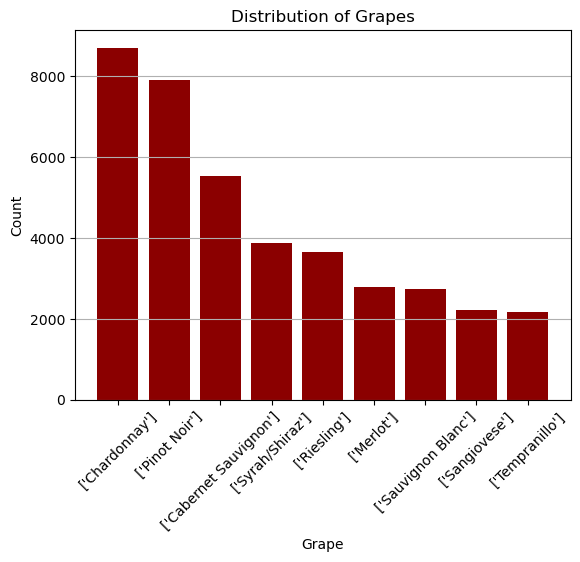

In [13]:
# Set up subplots in a 1x1 layout
fig, axes = plt.subplots(1, 1)

# Bar Chart for Grape Distribution
grape_counts = df_wines['Grapes'].value_counts()
filtered_grape_counts = grape_counts[grape_counts > 2000]
axes.bar(filtered_grape_counts.index, filtered_grape_counts.values, color='#8B0000')  # You can change the color to 'wine red'
axes.set_xlabel('Grape')
axes.set_ylabel('Count')
axes.set_title('Distribution of Grapes')
axes.tick_params(axis='x', rotation=45)
axes.grid(axis='y')

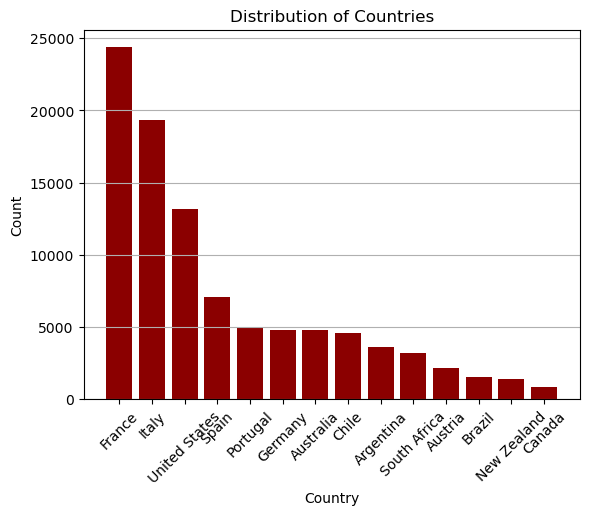

In [14]:
# Set up subplots in a 1x1 layout
fig, axes = plt.subplots(1, 1)

# Bar Chart for Country Distribution
country_counts = df_wines['Country'].value_counts()
country_counts = country_counts[country_counts > 800]
axes.bar(country_counts.index, country_counts.values, color='#8B0000')  # You can change the color to 'wine red'
axes.set_xlabel('Country')
axes.set_ylabel('Count')
axes.set_title('Distribution of Countries')
axes.tick_params(axis='x', rotation=45)
axes.grid(axis='y')

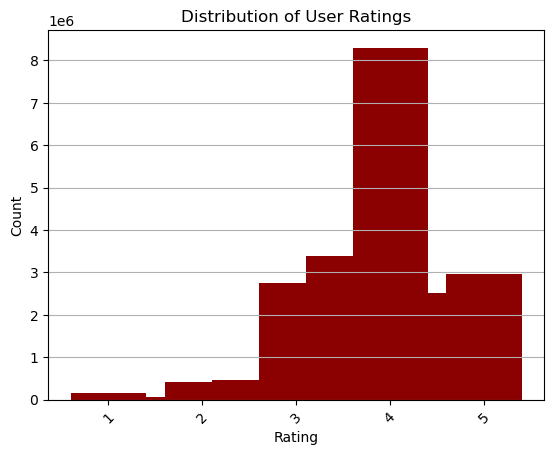

In [15]:
# Set up subplots in a 1x1 layout
fig, axes = plt.subplots(1, 1)


# Bar Chart for Rating Distribution
rating_counts = df_ratings['Rating'].value_counts()
axes.bar(rating_counts.index, rating_counts.values, color='#8B0000')  # You can change the color to 'wine red'
axes.set_xlabel('Rating')
axes.set_ylabel('Count')
axes.set_title('Distribution of User Ratings')
axes.tick_params(axis='x', rotation=45)
axes.grid(axis='y')

Text(0.5, 1.0, 'Average ABV per Wine Type')

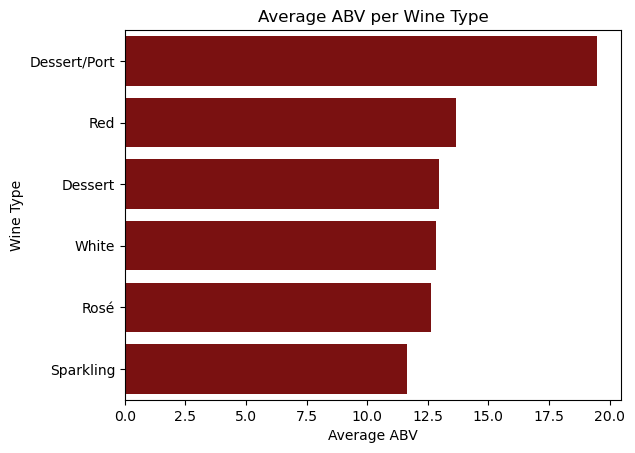

In [16]:
# Set up subplots in a 1x1 layout
fig, axes = plt.subplots(1, 1)


# Bar Chart for Average ABV per Wine Type
avg_abv_by_type = df_wines.groupby('Type')['ABV'].mean().sort_values(ascending=False)
sns.barplot(x=avg_abv_by_type.values, y=avg_abv_by_type.index, ax=axes, color='#8B0000')
axes.set_xlabel('Average ABV')
axes.set_ylabel('Wine Type')
axes.set_title('Average ABV per Wine Type')

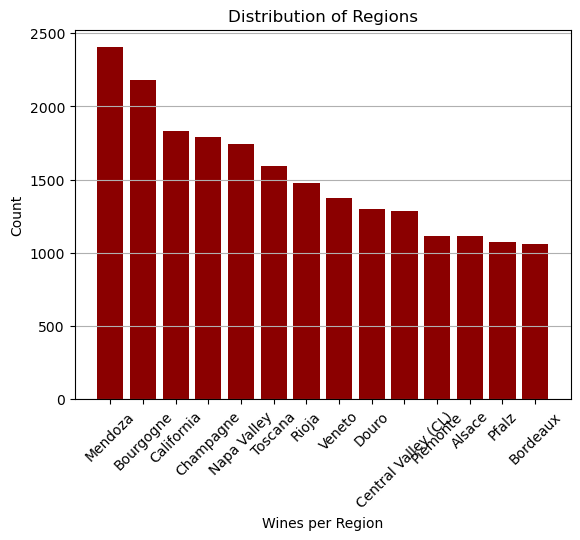

In [17]:
# Set up subplots in a 1x1 layout
fig, axes = plt.subplots(1, 1)


# Bar Chart for RegionName Distribution
region_counts = df_wines['RegionName'].value_counts()
region_counts = region_counts[region_counts > 1000]
axes.bar(region_counts.index, region_counts.values, color='#8B0000')  # You can change the color to 'wine red'
axes.set_xlabel('Wines per Region')
axes.set_ylabel('Count')
axes.set_title('Distribution of Regions')
axes.tick_params(axis='x', rotation=45)
axes.grid(axis='y')

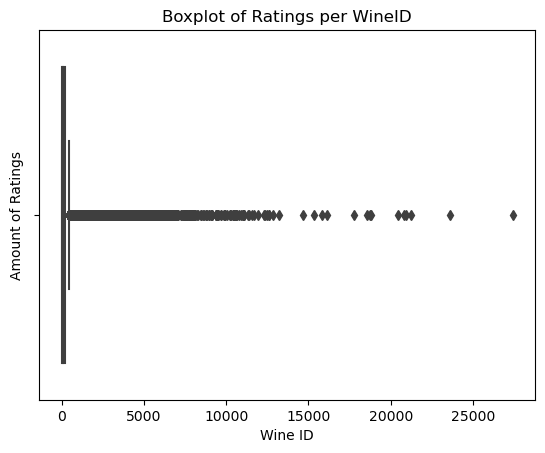

In [18]:
# Boxplot for WineID
wineid_counts = df_ratings['WineID'].value_counts()

sns.boxplot(x=wineid_counts)

# Set labels and title
plt.xlabel('Wine ID')
plt.ylabel('Amount of Ratings')
plt.title('Boxplot of Ratings per WineID')

# Show the plot
plt.show()

## Preprocessing

### Preprocessing: df_ratings

In [19]:
#Drop Vintage Values = 'N.V.'
df_ratings = df_ratings[df_ratings['Vintage'] != 'N.V.']

#Drop Date Attribute
df_ratings.drop('Date', axis=1, inplace=True)

#Cast Vintage to Int
df_ratings['Vintage'] = df_ratings['Vintage'].astype(int)

In [20]:
# Combine WineID and Vintage into a new column 'WineYearID'
df_ratings['WineYearID'] = df_ratings['WineID'].astype(str) + df_ratings['Vintage'].astype(str)

#WineYearID to Integer
df_ratings['WineYearID'] = df_ratings['WineYearID'].astype(int)

#WineYearID as first column
df_ratings = df_ratings[['WineYearID'] + [col for col in df_ratings.columns if col != 'WineYearID']]

In [21]:
#Group by 'WineYearID' and calculate average rating and number of ratings
df_avg_ratings = df_ratings.groupby([
    'WineYearID',
    'WineID',
    'Vintage']).agg(Average_Rating = ('Rating', 'mean'), Number_of_Ratings = ('Rating', 'count')).reset_index()

# Convert 'Average_Rating' to float, round to 2 decimals
df_avg_ratings['Average_Rating'] = df_avg_ratings['Average_Rating'].astype(float).round(2)

In [22]:
#Group the data by 'Vintage' and calculate the average per Vintage
average_ratings = df_avg_ratings.groupby('Vintage')['Average_Rating'].mean()

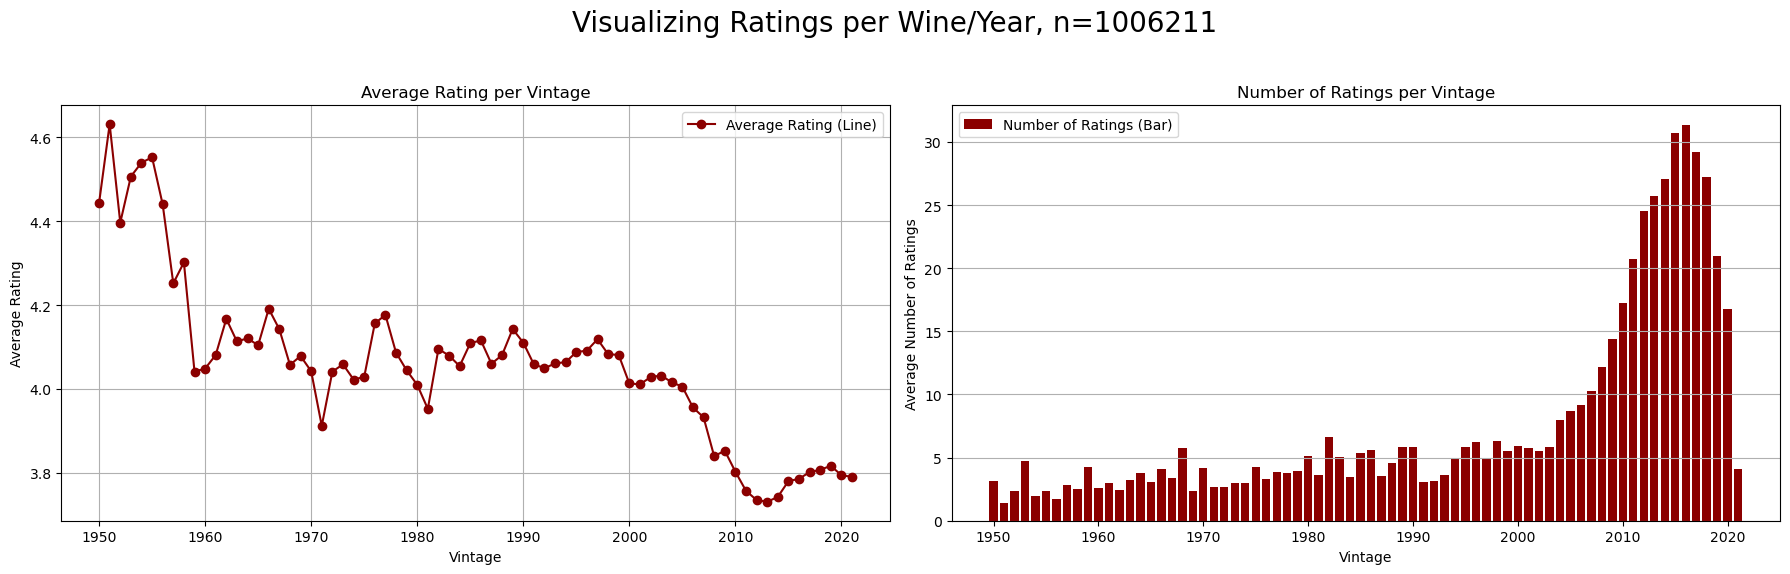

In [23]:
#Visualising df_ratings

average_ratings = df_avg_ratings.groupby('Vintage')['Average_Rating'].mean()
average_num_ratings = df_avg_ratings.groupby('Vintage')['Number_of_Ratings'].mean()
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Line Plot for Average Rating
axes[0].plot(average_ratings.index, average_ratings.values, marker='o', color='#8B0000', label='Average Rating (Line)')
axes[0].set_xlabel('Vintage')
axes[0].set_ylabel('Average Rating')
axes[0].set_title('Average Rating per Vintage')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Bar Chart for Average Number of Ratings
axes[1].bar(average_num_ratings.index, average_num_ratings.values, color='#8B0000', label='Number of Ratings (Bar)')
axes[1].set_xlabel('Vintage')
axes[1].set_ylabel('Average Number of Ratings')
axes[1].set_title('Number of Ratings per Vintage')
axes[1].legend()
axes[1].grid(axis='y')

fig.suptitle(f'Visualizing Ratings per Wine/Year, n={df_avg_ratings.shape[0]}', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Merging df_avg_ratings & df_wines  

In [24]:
#Merge both DataFrames based on the WineID ('left join')
df_merged = pd.merge(df_avg_ratings, df_wines, on='WineID', how='left')

#double check columns
df_merged.columns
df_merged.shape

(1006211, 17)

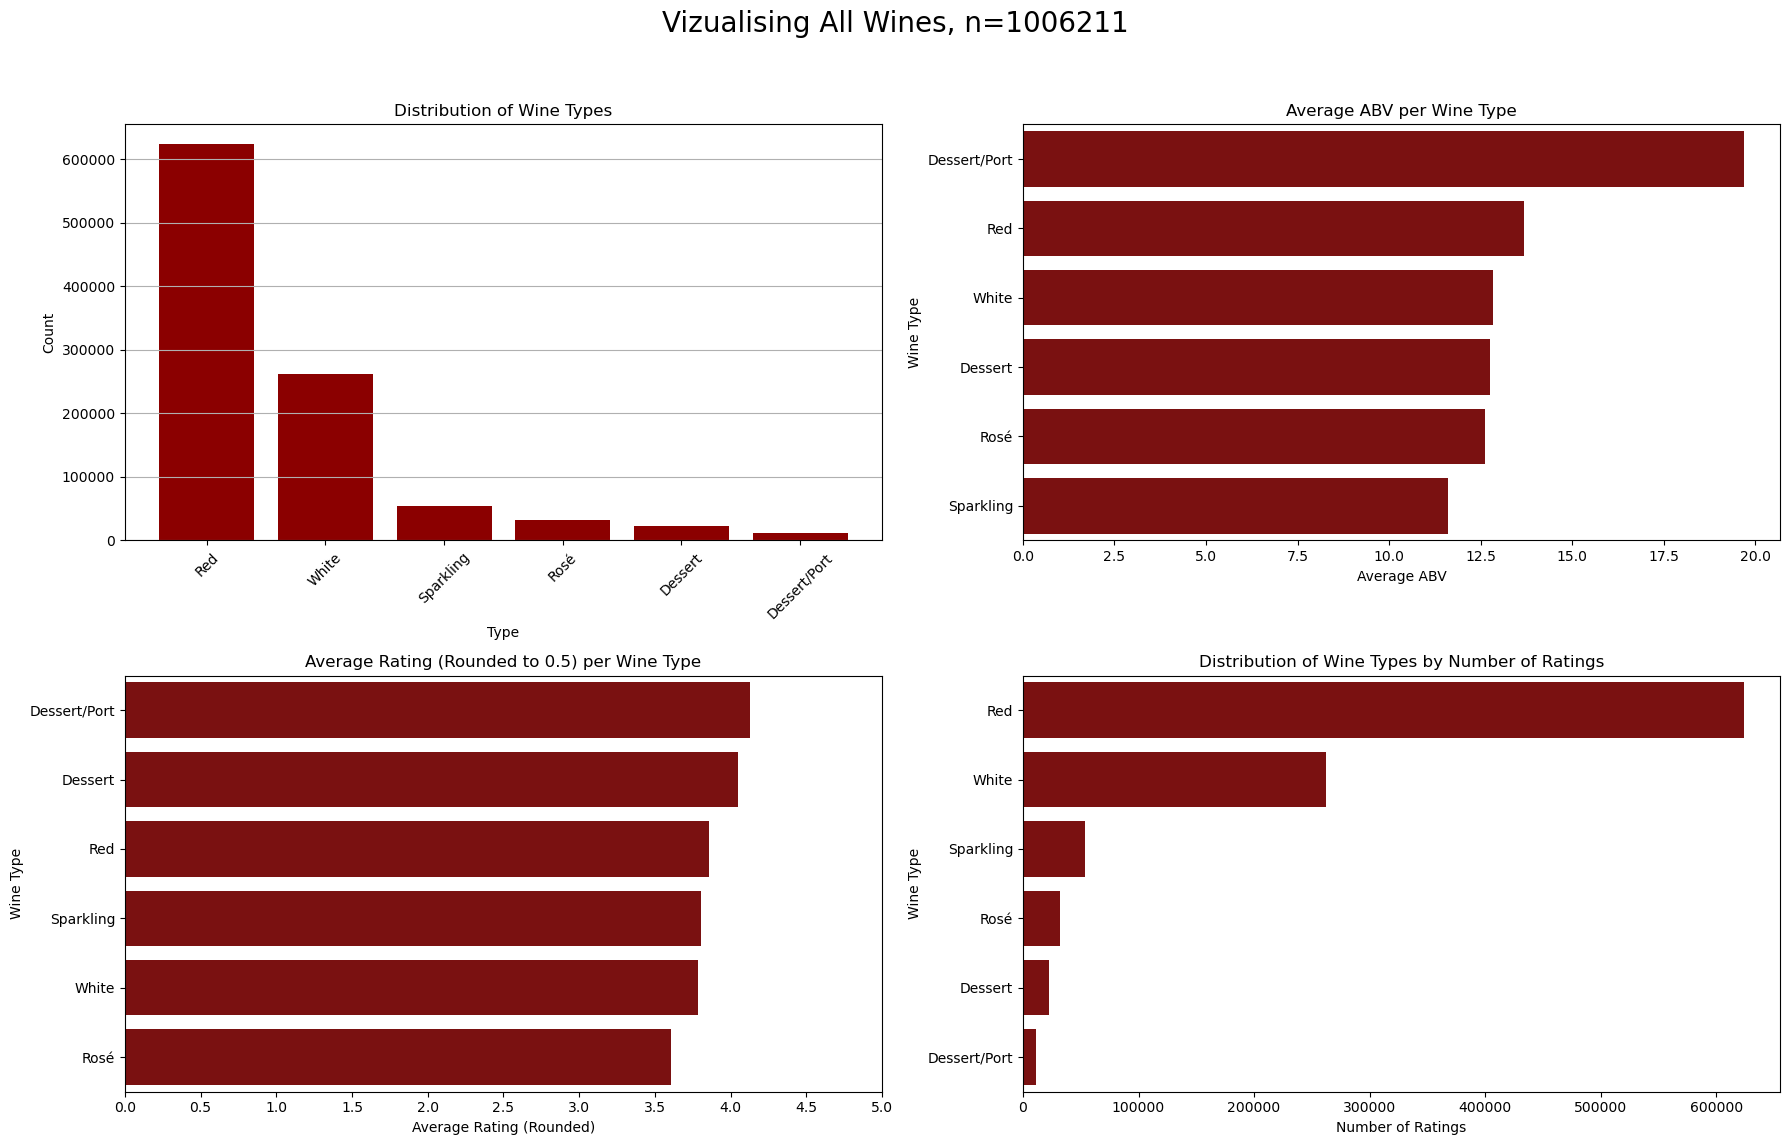

In [25]:
# Set up subplots in a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Bar Chart for Wine Types Distribution
type_counts = df_merged['Type'].value_counts()
axes[0, 0].bar(type_counts.index, type_counts.values, color='#8B0000')  # You can change the color to 'wine red'
axes[0, 0].set_xlabel('Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Wine Types')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y')

# Plot 2: Bar Chart for Average ABV per Wine Type
avg_abv_by_type = df_merged.groupby('Type')['ABV'].mean().sort_values(ascending=False)
sns.barplot(x=avg_abv_by_type.values, y=avg_abv_by_type.index, ax=axes[0, 1], color='#8B0000')
axes[0, 1].set_xlabel('Average ABV')
axes[0, 1].set_ylabel('Wine Type')
axes[0, 1].set_title('Average ABV per Wine Type')

# Plot 3: Bar Chart for Average Rating (Rounded) per Wine Type
df_merged['Average_Rating_Rounded'] = df_merged['Average_Rating'].apply(lambda x: round(x * 2) / 2)
avg_rating_by_type = df_merged.groupby('Type')['Average_Rating_Rounded'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating_by_type.values, y=avg_rating_by_type.index, ax=axes[1, 0], color='#8B0000')
axes[1, 0].set_xlabel('Average Rating (Rounded)')
axes[1, 0].set_ylabel('Wine Type')
axes[1, 0].set_title('Average Rating (Rounded to 0.5) per Wine Type')
axes[1, 0].set_xticks(np.arange(0, 5.1, 0.5))  # Set x-axis ticks from 0 to 5 with 0.5 intervals

# Plot 4: Bar Chart for Wine Types Distribution by Number of Ratings
wine_type_counts = df_merged['Type'].value_counts()
sns.barplot(x=wine_type_counts.values, y=wine_type_counts.index, ax=axes[1, 1], color='#8B0000')
axes[1, 1].set_xlabel('Number of Ratings')
axes[1, 1].set_ylabel('Wine Type')
axes[1, 1].set_title('Distribution of Wine Types by Number of Ratings')

fig.suptitle(f'Vizualising All Wines, n={df_merged.shape[0]}', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

### Reducing Dataset

In [26]:
# Limit to red wines
df_red_wines = df_merged[df_merged['Type'] == 'Red']
df_red_wines.shape

(623862, 18)

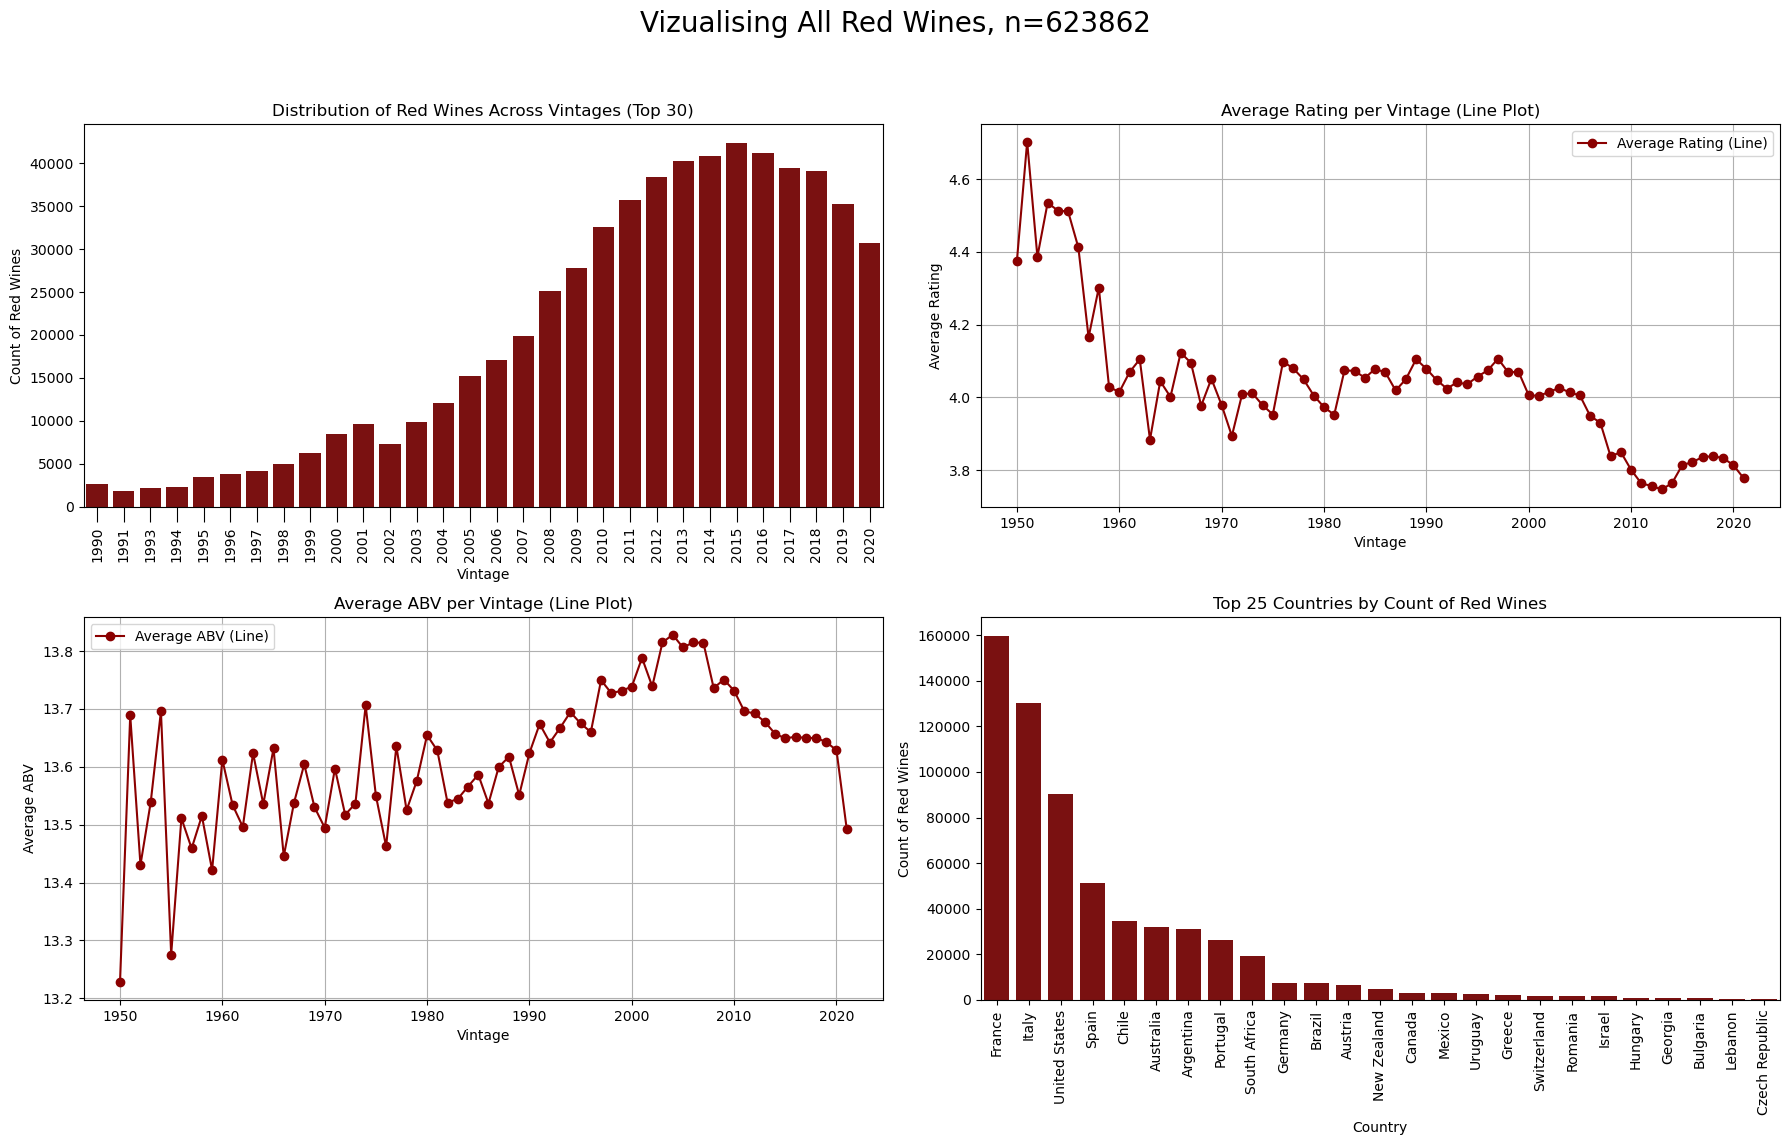

In [27]:
# Set up subplots in a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Bar Chart for Distribution of Red Wines Across Vintages
red_wines_per_vintage = df_red_wines['Vintage'].value_counts().sort_index().nlargest(30)
sns.barplot(x=red_wines_per_vintage.index, y=red_wines_per_vintage.values, ax=axes[0, 0], color='#8B0000')
axes[0, 0].set_xlabel('Vintage')
axes[0, 0].set_ylabel('Count of Red Wines')
axes[0, 0].set_title('Distribution of Red Wines Across Vintages (Top 30)')
axes[0, 0].tick_params(axis='x', rotation=90, size=11)

# Plot 2: Line Plot for Average Rating per Vintage
average_ratings = df_red_wines.groupby('Vintage')['Average_Rating'].mean()
axes[0, 1].plot(average_ratings.index, average_ratings.values, marker='o', color='#8B0000', label='Average Rating (Line)')
axes[0, 1].set_xlabel('Vintage')
axes[0, 1].set_ylabel('Average Rating')
axes[0, 1].set_title('Average Rating per Vintage (Line Plot)')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Line Plot for Average ABV per Vintage
average_abv = df_red_wines.groupby('Vintage')['ABV'].mean()
axes[1, 0].plot(average_abv.index, average_abv.values, marker='o', color='#8B0000', label='Average ABV (Line)')
axes[1, 0].set_xlabel('Vintage')
axes[1, 0].set_ylabel('Average ABV')
axes[1, 0].set_title('Average ABV per Vintage (Line Plot)')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Bar Chart for Top 25 Countries by Count of Red Wines
red_wines_per_country = df_red_wines['Country'].value_counts()
top_25_countries = red_wines_per_country.head(25)
sns.barplot(x=top_25_countries.index, y=top_25_countries.values, ax=axes[1, 1], color='#8B0000')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Count of Red Wines')
axes[1, 1].set_title('Top 25 Countries by Count of Red Wines')
axes[1, 1].tick_params(axis='x', rotation=90)

fig.suptitle(f'Vizualising All Red Wines, n={df_red_wines.shape[0]}', size=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [28]:
# Limit to Wines from 2008 to 2020 (inclusive)
df_vintage = df_red_wines[(df_red_wines['Vintage'] >= 2008) & (df_red_wines['Vintage'] <= 2020)]
df_vintage.shape

(468433, 18)

In [29]:
#Limit to the South of Europe
desired_countries = ['Italy', 'Spain', 'France', 'Portugal']
df_vintage_country = df_vintage[df_vintage['Country'].isin(desired_countries)]
df_vintage_country.shape

(262981, 18)

In [30]:
#Limit to wineries with >= 110 wines
winery_counts = df_vintage_country['WineryID'].value_counts()
wineries_over_200 = winery_counts[winery_counts >= 110].index
df_vintage_country_wineries = df_vintage_country[df_vintage_country['WineryID'].isin(wineries_over_200)]
df_vintage_country_wineries.shape

(44624, 18)

In [31]:
# Limit to wines with >= 100 ratings
df_vintage_country_wineries_wines = df_vintage_country_wineries[
    df_vintage_country_wineries['Number_of_Ratings'] >= 100]
df_vintage_country_wineries_wines.shape

(4296, 18)

In [32]:
#Rename to df_final
df_final = df_vintage_country_wineries_wines

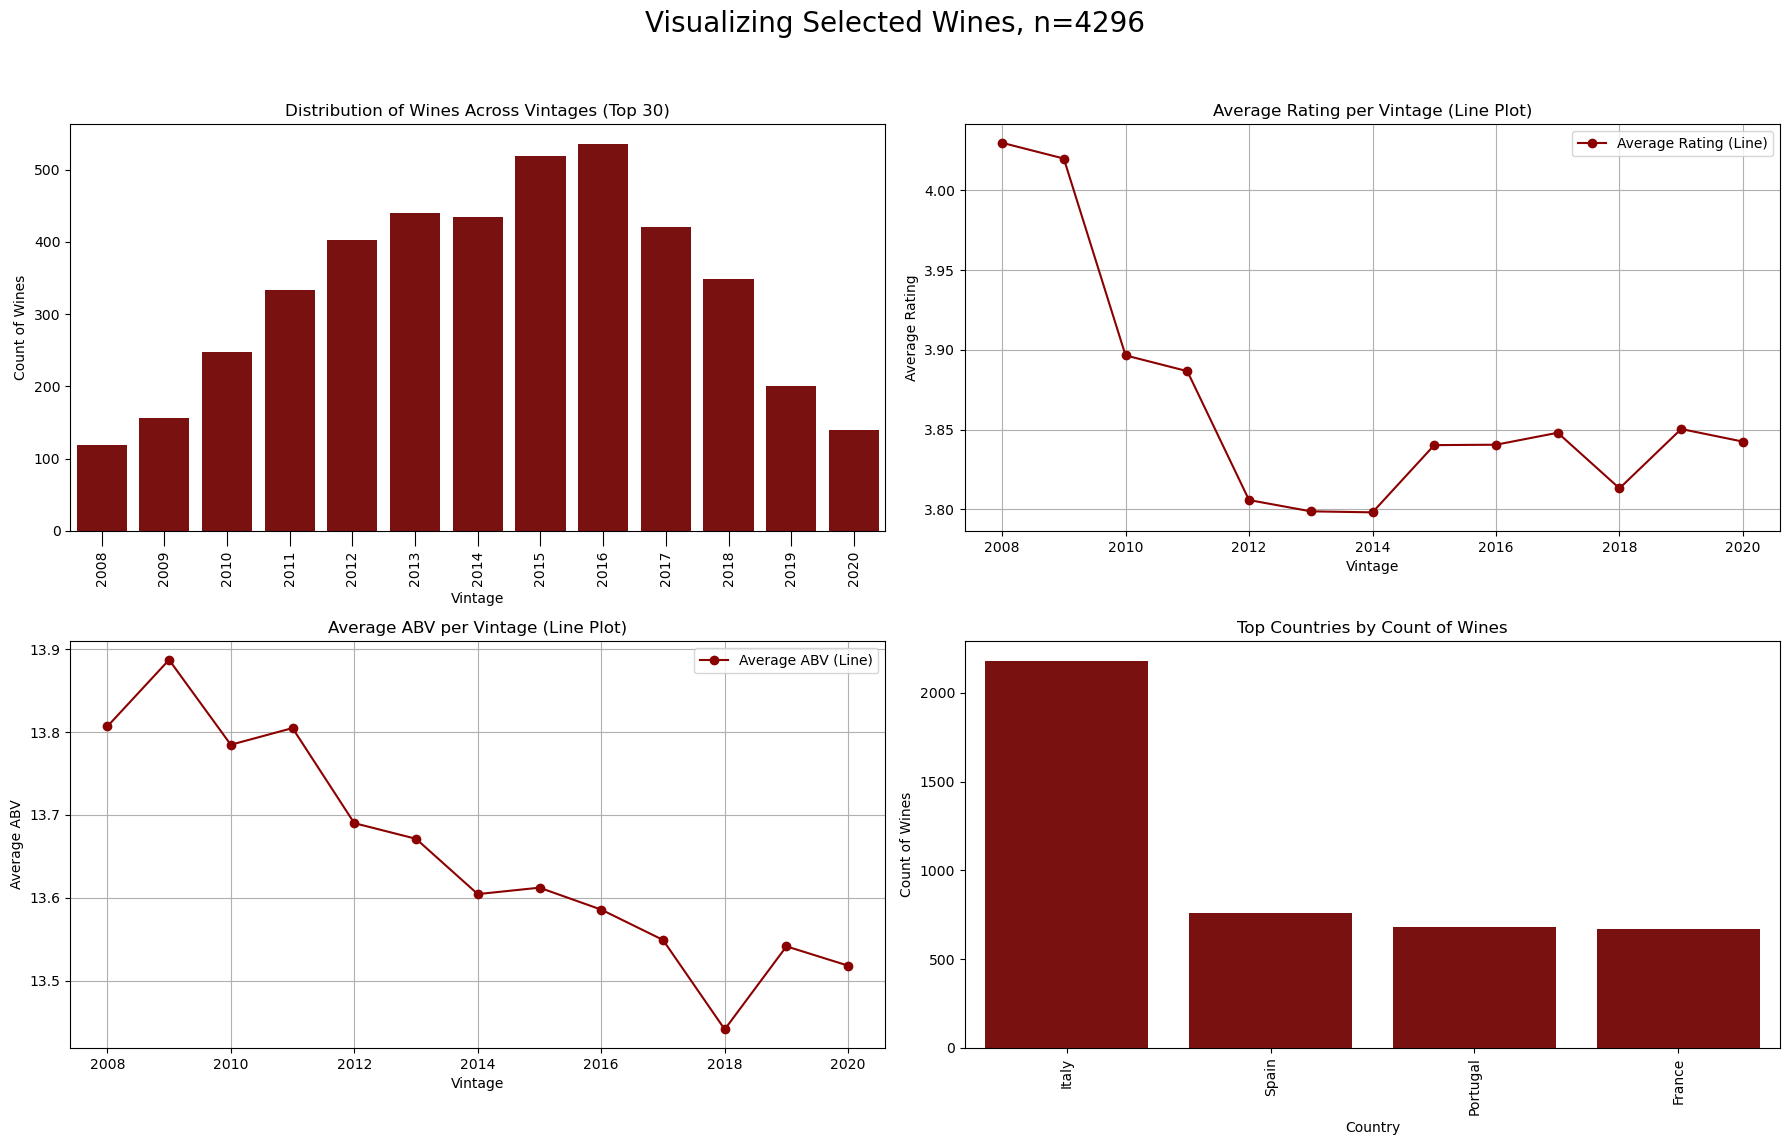

In [33]:
#Visualize df_final

# Set up subplots in a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Bar Chart for Distribution of Red Wines Across Vintages
wines_per_vintage = df_final['Vintage'].value_counts().sort_index().nlargest(30)
sns.barplot(x=wines_per_vintage.index, y=wines_per_vintage.values, ax=axes[0, 0], color='#8B0000')
axes[0, 0].set_xlabel('Vintage')
axes[0, 0].set_ylabel('Count of Wines')
axes[0, 0].set_title('Distribution of Wines Across Vintages (Top 30)')
axes[0, 0].tick_params(axis='x', rotation=90, size=11)

# Plot 2: Line Plot for Average Rating per Vintage
average_ratings = df_final.groupby('Vintage')['Average_Rating'].mean()
axes[0, 1].plot(average_ratings.index, average_ratings.values, marker='o', color='#8B0000', label='Average Rating (Line)')
axes[0, 1].set_xlabel('Vintage')
axes[0, 1].set_ylabel('Average Rating')
axes[0, 1].set_title('Average Rating per Vintage (Line Plot)')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Line Plot for Average ABV per Vintage
average_abv = df_final.groupby('Vintage')['ABV'].mean()
axes[1, 0].plot(average_abv.index, average_abv.values, marker='o', color='#8B0000', label='Average ABV (Line)')
axes[1, 0].set_xlabel('Vintage')
axes[1, 0].set_ylabel('Average ABV')
axes[1, 0].set_title('Average ABV per Vintage (Line Plot)')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 4: Bar Chart for Top 25 Countries by Count of Red Wines
wines_per_country = df_final['Country'].value_counts()
top_25_countries = wines_per_country.head(25)
sns.barplot(x=top_25_countries.index, y=top_25_countries.values, ax=axes[1, 1], color='#8B0000')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Count of Wines')
axes[1, 1].set_title('Top Countries by Count of Wines')
axes[1, 1].tick_params(axis='x', rotation=90)

fig.suptitle(f'Visualizing Selected Wines, n={df_vintage_country_wineries_wines.shape[0]}', size=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Regressions

### Dummy Regressor (Baseline)

In [34]:
#Feature Selection & Hot-Encoding
X_dm = df_final[['WineID','ABV', 'Vintage','RegionID', 'WineryID', 'Acidity', 'Body']]
y_dm = df_final['Average_Rating']

#Hot-Encode Categorical Columns
categorical_columns = ['Body', 'Acidity']
X_dm = pd.get_dummies(X_dm, columns=categorical_columns)

#Standardize the 'ABV' feature
scaler = StandardScaler()
X_dm[['ABV']] = scaler.fit_transform(X_dm[['ABV']])

#Apply Train_Test_Split
X_train_dm, X_test_dm, y_train_dm, y_test_dm = train_test_split(X_dm, y_dm, test_size=0.15, random_state=42)

In [35]:
# Create DecisionTree regression model
model_dm = DummyRegressor()

# Fit the model to the training data
model_dm.fit(X_train_dm, y_train_dm)

# Make predictions on the test set
y_pred_dm = model_dm.predict(X_test_dm)

# Evaluate the DecisionTree regression model
train_score_dm = model_dm.score(X_train_dm, y_train_dm)
test_score_dm = model_dm.score(X_test_dm, y_test_dm)

# Print the results
print("Train Score: {:.3f}".format(train_score_dm))
print("Test Score: {:.3f}".format(test_score_dm))

Train Score: 0.000
Test Score: -0.000


In [37]:
#Calculate & Print Test Scores
r2_dm, mae_dm, mse_dm, rmse_dm = get_metrics(y_test_dm, y_pred_dm)
print(f'Scores for Dummy Regression Model\nr2: {r2_dm}\nmae: {mae_dm}\nmse: {mse_dm}\nrmse: {rmse_dm}')

Scores for Dummy Regression Model
r2: -6.970582215148902e-05
mae: 0.27369844940007937
mse: 0.11585940271590407
rmse: 0.3403812608177837


### Linear Regression

In [38]:
#Feature Selection & Hot-Encoding
X_lr = df_final[['WineID','ABV', 'Vintage','RegionID', 'WineryID', 'Acidity', 'Body']]
y_lr = df_final['Average_Rating']

#Hot-Encode Categorical Columns
categorical_columns = ['Body', 'Acidity']
X_lr = pd.get_dummies(X_lr, columns=categorical_columns)

#Standardize the 'ABV' feature
scaler = StandardScaler()
X_lr[['ABV']] = scaler.fit_transform(X_lr[['ABV']])

#Apply Train_Test_Split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.15, random_state=42)

In [39]:
#Add polynomial features (third degree)
poly_features = PolynomialFeatures(degree=3)
X_train_lr = poly_features.fit_transform(X_train_lr)
X_test_lr = poly_features.transform(X_test_lr)

#Create & Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train_lr, y_train_lr)

#Make predictions on the test set
y_pred_lr = model.predict(X_test_lr)


In [40]:
#Calculate & Print Test Scores
r2_lr, mae_lr, mse_lr, rmse_lr = get_metrics(y_test_lr, y_pred_lr)
print(f'Scores for Linear Regression Model\nr2: {r2_lr}\nmae: {mae_lr}\nmse: {mse_lr}\nrmse: {rmse_lr}')


Scores for Linear Regression Model
r2: 0.44541272948741695
mae: 0.19649518377193262
mse: 0.06424967133926773
rmse: 0.25347518880408737


### KNN Regression

In [41]:
#Feature Selection & Hot-Encoding
X_knn = df_final[['WineID','ABV', 'Vintage','RegionID', 'WineryID', 'Acidity', 'Body']]
y_knn = df_final['Average_Rating']

#Hot-Encode Categorical Columns
categorical_columns = ['Body', 'Acidity']
X_knn = pd.get_dummies(X_knn, columns=categorical_columns)

# Standardize the 'ABV' feature
scaler = StandardScaler()
X_knn[['ABV']] = scaler.fit_transform(X_knn[['ABV']])

#Apply Train_Test_Split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.15, random_state=42)

In [42]:
# Build & Fit the Model
knn_model = KNeighborsRegressor(n_neighbors=2)

#Implement a BaggingRegressor
model_knn_bagg = BaggingRegressor(base_estimator=knn_model, n_estimators=12, random_state=42)
model_knn_bagg.fit(X_train_knn, y_train_knn)

# Make predictions on the test set
y_pred_knn = model_knn_bagg.predict(X_test_knn)


/Users/beatweichsler/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [43]:
#Calculate & Print Test Scores
r2_knn, mae_knn, mse_knn, rmse_knn = get_metrics(y_test_knn, y_pred_knn)
print(f'Scores for KNN Model\nr2: {r2_knn}\nmae: {mae_knn}\nmse: {mse_knn}\nrmse: {rmse_knn}')


Scores for KNN Model
r2: 0.8072388164926333
mae: 0.10424870801033594
mse: 0.02233163894272179
rmse: 0.14943774269816107


### Random Forest Regressor

In [44]:
#Feature Selection
X_rf = df_final[['WineID','ABV', 'Vintage','RegionID', 'WineryID', 'Acidity', 'Body']]
y_rf = df_final['Average_Rating']

# encode ordinal attributes
label_encoder = LabelEncoder()
X_rf = X_rf.copy()
X_rf['Acidity'] = label_encoder.fit_transform(X_rf['Acidity'])
X_rf['Body'] = label_encoder.fit_transform(X_rf['Body'])

#Apply Train_Test_Split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.15, random_state=42)

In [45]:
# Create RandomForest regression model. Hyperparameters optimized with GridSeach.
model_rf = RandomForestRegressor(n_estimators=204, max_depth=20, random_state=42)
# Hyperparameters based on the GridSearch below
model_rf.fit(X_train_rf, y_train_rf)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test_rf)

In [46]:
#Calculate & Print Test Scores
r2_rf, mae_rf, mse_rf, rmse_rf = get_metrics(y_test_rf, y_pred_rf)
print(f'Scores for Random Forest Regressor Model\nr2: {r2_rf}\nmae: {mae_rf}\nmse: {mse_rf}\nrmse: {rmse_rf}')

Scores for Random Forest Regressor Model
r2: 0.8415546412006536
mae: 0.09756457600694136
mse: 0.01835610510620147
rmse: 0.13548470432562293


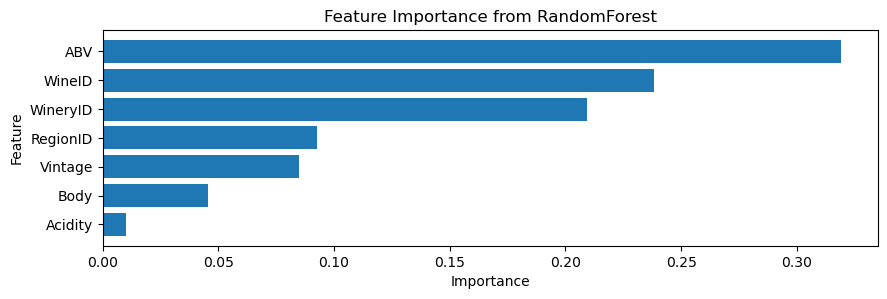

In [47]:
#Create feature importance matrix
importances = model_rf.feature_importances_
features = X_train_rf.columns
feature_importance = sorted(zip(importances, features), reverse=True)

#Plotting matrix
sorted_importances = [value[0] for value in feature_importance]
sorted_features = [value[1] for value in feature_importance]
plt.figure(figsize=(10, len(sorted_features) * 0.4))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForest')
plt.gca().invert_yaxis()
plt.show()

In [48]:
#Appendix1: GridSeach Algorithm to optimize RandomForest hyperparameters

param_grid = {
    'n_estimators': [203, 204, 205],
    'max_depth': [19, 20, 21]
}

model_rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train_rf, y_train_rf)
best_params = grid_search.best_params_
best_model_rf = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], random_state=42)
best_model_rf.fit(X_train_rf, y_train_rf)
y_pred_rf = best_model_rf.predict(X_test_rf)
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'n_estimators': 204}


In [49]:
#Appendix2: k-fold cross validation to check for overfitting

model_rf = RandomForestRegressor(n_estimators=204, max_depth=20, random_state=42)
r2_scorer = make_scorer(r2_score)
cv_scores = cross_val_score(model_rf, X_train_rf, y_train_rf, cv=5, scoring=r2_scorer)
print("Cross-Validation R2 Scores:", cv_scores)
print("Mean R2 Score:", cv_scores.mean())
print("Standard Deviation R2 Score:", cv_scores.std())

Cross-Validation R2 Scores: [0.7908216  0.82707878 0.77805408 0.80927612 0.7722985 ]
Mean R2 Score: 0.7955058169148519
Standard Deviation R2 Score: 0.020256149843345173


### XGBoost Regressor

In [50]:
#Feature Selection
X_xgb = df_final[['WineID','ABV', 'Vintage','RegionID', 'WineryID', 'Acidity', 'Body']]
y_xgb = df_final['Average_Rating']

# encode ordinal attributes
label_encoder = LabelEncoder()
X_xgb = X_xgb.copy()
X_xgb['Acidity'] = label_encoder.fit_transform(X_xgb['Acidity'])
X_xgb['Body'] = label_encoder.fit_transform(X_xgb['Body'])

#Apply Train_Test_Split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.15, random_state=42)

In [51]:
# Create XGBoost regression model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_xgb, y_train_xgb)

# Make predictions on the test set
xgb_y_pred = xgb_model.predict(X_test_xgb)

In [52]:
#Calculate & Print Test Scores
r2_xgb, mae_xgb, mse_xgb, rmse_xgb = get_metrics(y_test_xgb, xgb_y_pred)
print(f'Scores for XGBooost Model\nr2: {r2_xgb}\nmae: {mae_xgb}\nmse: {mse_xgb}\nrmse: {rmse_xgb}')

Scores for XGBooost Model
r2: 0.8339859540460952
mae: 0.10075759092227433
mse: 0.019232947558248125
rmse: 0.13868290290532617


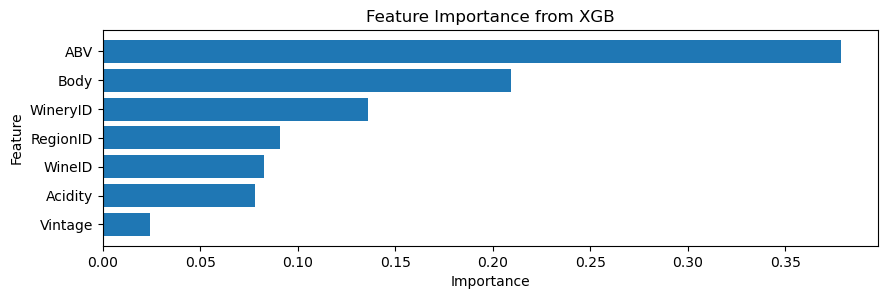

In [53]:
#Create feature importance matrix
importances = xgb_model.feature_importances_
features = X_train_xgb.columns
feature_importance = sorted(zip(importances, features), reverse=True)

#Plotting matrix
sorted_importances = [value[0] for value in feature_importance]
sorted_features = [value[1] for value in feature_importance]
plt.figure(figsize=(10, len(sorted_features) * 0.4))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGB')
plt.gca().invert_yaxis()
plt.show()

### Results Table

In [54]:
#Display all scores in a matrix
results = pd.DataFrame({
    'Model': ['Dummy', 'Linear Regression', 'KNN', 'Random Forest', 'XGBoost'],
    'R²': [r2_dm, r2_lr, r2_knn, r2_rf, r2_xgb],
    'MAE': [mae_dm, mae_lr, mae_knn, mae_rf, mae_xgb],
    'MSE': [mse_dm, mse_lr, mse_knn, mse_rf, mse_xgb],
    'RMSE': [rmse_dm, rmse_lr, rmse_knn, rmse_rf, rmse_xgb],
})

# display results
results

,Model,R²,MAE,MSE,RMSE
0,Dummy,-0.000070,0.273698,0.115859,0.340381
1,Linear Regression,0.445413,0.196495,0.064250,0.253475
2,KNN,0.807239,0.104249,0.022332,0.149438
3,Random Forest,0.841555,0.097565,0.018356,0.135485
4,XGBoost,0.833986,0.100758,0.019233,0.138683
